# bank client data:  은행고객 데이터

나이, 직업, 결혼여부, 교육수준, 파산여부, 주택대출여부, 개인대출여부

1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>

# related with the last contact of the current campaign:

캠페인의 마지막 컨택 관련 데이터

컨택한기기 타입 / 컨택한 월 / 컨택한 요일 / 통화시간


8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - duration: last contact duration, in seconds (numeric). <br>
# other attributes:

이번 캠페인에서 몇번이나 컨택 되었는지 / 이후 몇일 지났는지 / 이전 캠페인에서 몇번이나 컨택되었는지 / 


12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
# social and economic context attributes

사회 경제적 속성 데이터

고용변동률 , 소비자물가지수, 소비자신뢰지수, 유리보3개월금리, 취업자수


16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)<br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)<br>
20 - nr.employed: number of employees - quarterly indicator (numeric)<br>

# Output variable:

은행상품 가입여부

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [35]:
import pandas as pd
from pandas import Series
from pandas import DataFrame
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [36]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [37]:
filepath = os.path.join(r'C:\DevRoot\dataset','bank-additional-full.csv')
df = pd.read_csv(filepath,sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 3_2. 나이(age) 구간별, 분포형태 시각화하기
- 나이대별 히스토그램을 시각화하기

In [39]:
#내가 한거

<BarContainer object of 9 artists>

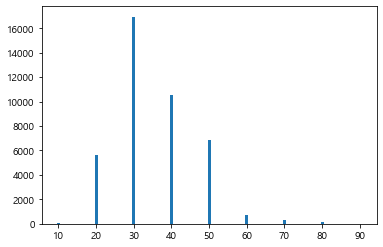

In [40]:
def age_slice(age):
    if age < 20:
        return 10
    elif age <30:
        return 20
    elif age <40:
        return 30
    elif age <50:
        return 40
    elif age <60:
        return 50
    elif age <70:
        return 60
    elif age <80:
        return 70
    elif age <90:
        return 80
    else:
        return 90
slice_age = df['age'].apply(age_slice)
slice_age
slice_age_ct = slice_age.value_counts()
plt.bar(slice_age_ct.index,slice_age_ct)

In [41]:
# 강사님이 한거

Text(0.5, 0, 'age')

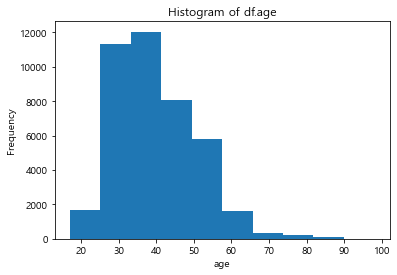

In [42]:
df['age'].plot.hist()
plt.title('Histogram of df.age',fontsize=12)
plt.xlabel("age")
# df['age'].plot.hist(bins=range(10, 101, 10), figsize=[15, 8])
# plt.title('Histogram of df.age',fontsize=12)
# plt.xlabel("age")

In [43]:
# 내가한거는 함수만들어서 나이대 나누고 (새로운 변수 추가시도)
# 그에대한 카운트 값과 인덱스로
# 강사님은 'age'변수에 대한 plot.hist를 써서 바로

-----------------

# 3_3. 통화시간(duration) 분포 확인하기
- 통화시간(duration) 을 histogram 시각화 하여 분포 확인하기
- 오름차순 정렬
- duration 의 범위값을 반영하여 histogram 의 bins 옵션을 주기 (100 단위로 구간 설정)

In [44]:
#내가한거

<AxesSubplot:xlabel='duration', ylabel='Count'>

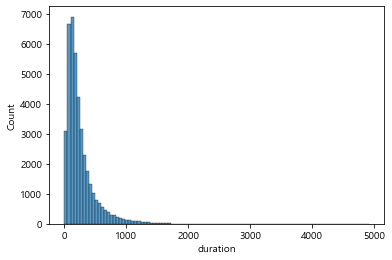

In [45]:
sns.histplot(x='duration',data=df,bins=100)

In [46]:
#강사님이 한거

Text(0.5, 0, '통화시간(duration)')

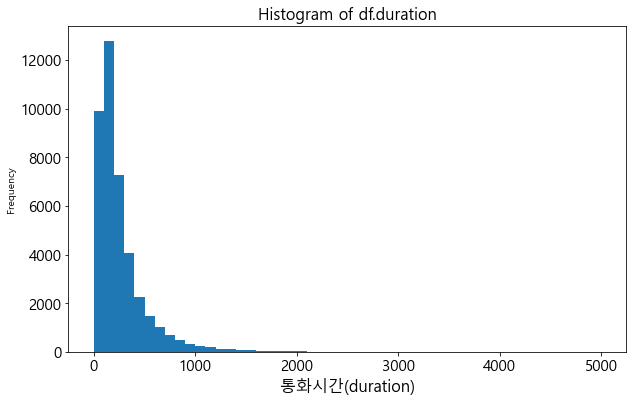

In [47]:
df['duration'].plot.hist(bins=range(0, 5001, 100), figsize=[10, 6])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram of df.duration',fontsize=16)
plt.xlabel('통화시간(duration)', fontsize=16)

In [48]:
#디테일 하게 강사님은 들어갔다 bins로 좀더 완만하게 만들고 크기도 지정
# label과 눈금 크기도 봐두자

---------------------------------

<AxesSubplot:xlabel='marital', ylabel='Count'>

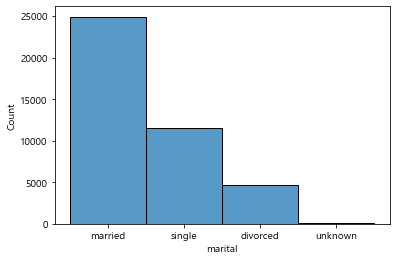

In [49]:
sns.histplot(x='marital',data=df,bins=100)

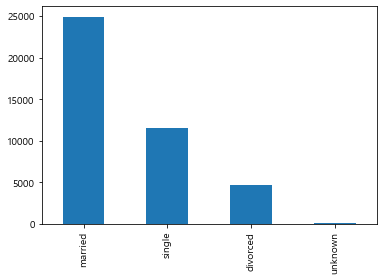

In [50]:
marital = df['marital'].value_counts()
marital.plot.bar()
plt.show()

In [51]:
#나는 seaborn으로 강사님은 plt 로 

---------

# 4_2. 교육수준에 따른 통계
- 교육수준 (education) 에 따른 분포 시각화 하기
- 오름차순

In [52]:
#내가한거

<BarContainer object of 8 artists>

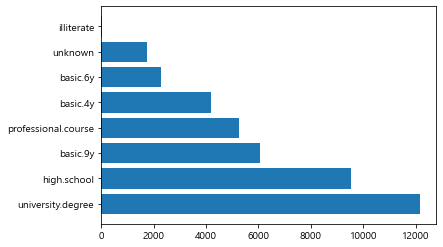

In [53]:
edu = df['education'].sort_values().value_counts()
edu.values
plt.barh(edu.index,edu)

In [54]:
#강사님이한거

<AxesSubplot:>

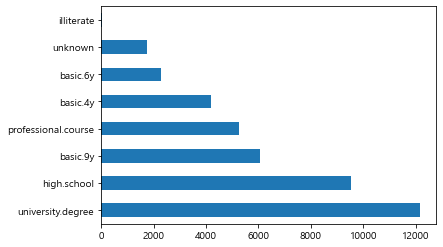

In [55]:
df['education'].value_counts().plot.barh()

In [56]:
#나는 education value를 sort시켜서 새로운 변수에 할당시킨다음 그리고
#강사님은 value_counts를 바로 그림 
# 그림 그릴때 sort가 자동으로 되는지? 확인?

---

In [57]:
### 가설 : "대출이 있는 사람이라면 은행 상품에 잘 가입하지 않을 것이다."

# 5_1. 가입여부('y') 에 따라 그룹 나누기
- 가입한 그룹은 yes_group 에 저장하고 확인하기
- 가입하지 않은 그룹은 no_group에 저장하고 확인하기

# 5_2 가설 검증하기
- 위에서 나뉜 은행상품가입자 와 은행상품 비가입자 의 대출여부 (loan) 의 '비율'을 분석하여 결과를 예시와 같은 DataFrame 으로 작성하세요
- 위 분석 결과에 따라 가설검증을 별도의 셀에 작성하세요 (주석으로 남기세요)

In [59]:
#내가 한거

In [60]:
yes_group = df[df['y']=='yes']
no_group = df[df['y']=='no']

In [61]:
yes_group_loan = yes_group.groupby('loan').count()['y']/yes_group.groupby('loan').count()['y'].sum()
yes_group_loan = yes_group_loan.sort_values(ascending=False)

In [62]:
no_group_loan = no_group.groupby('loan').count()['y'] / no_group.groupby('loan').count()['y'].sum()
no_group_loan = no_group_loan.sort_values(ascending=False)

In [63]:
cc = pd.concat([yes_group_loan,no_group_loan],axis=1)
cc.columns = ['은행상품가입자','은행상품 비가입자']
cc.index = ['대출없음','대출있음','미확인']
cc

,은행상품가입자,은행상품 비가입자
대출없음,0.829741,0.823574
대출있음,0.147198,0.152266
미확인,0.023060,0.024160


In [64]:
#강사님이 한거

In [65]:
grouped = df.groupby('y')
grouped.size()

y
no     36548
yes     4640
dtype: int64

In [66]:
yes_group = grouped.get_group('yes')
no_group = grouped.get_group('no')

In [67]:
yes = yes_group['loan'].value_counts()
yes

no         3850
yes         683
unknown     107
Name: loan, dtype: int64

In [68]:
no = no_group['loan'].value_counts()
no

no         30100
yes         5565
unknown      883
Name: loan, dtype: int64

In [69]:
yes = yes / yes.sum()
yes

no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [70]:
no = no / no.sum()
no

no         0.823574
yes        0.152266
unknown    0.024160
Name: loan, dtype: float64

In [71]:
pd.concat([yes, no], axis=1)

,loan,loan
no,0.829741,0.823574
yes,0.147198,0.152266
unknown,0.023060,0.024160


In [72]:
yes.name = '은행상품가입자'
no.name = '은행상품 비가입자'

result_df = pd.concat([yes, no], axis=1)

result_df.index = ['대출없슴', '대출있슴', '미확인']

result_df

,은행상품가입자,은행상품 비가입자
대출없슴,0.829741,0.823574
대출있슴,0.147198,0.152266
미확인,0.023060,0.024160


In [73]:
#나는 yes no를 마스크를 씌워서 구별 지은 후
#각 groupby(['loan']데이터프레임의 count값에 
#전체 sum을 나누어 비율을 만들고
#concat으로 연결시킨다음 각 컬럼과 인덱스의 명을 바꾸어줌

In [74]:
#강사님은 'y'로 그룹 지은 다음 get_groups를 한것을 각 데이터 프레임으로만들고
#value counts를 새로 또 할당하여
# 복잡한게 안보이게 만들고 sum으로 나우어 비율 구함
#그리고 각 비율이 들어간 데이터 프레임에 name 지정하여 열이름 만들고 
#concat후 나랑 동일하게 index이름 변경

----------------------------------------------------------

# 6_1. 은행상품 가입여부 (‘y’) 에 따른 직업(job)별  ‘평균’ 나이(age) 를 pivot table 로 작성해보세요
- 작성한 pivot table (은) pivot 이라는 변수에 담아두세요

# 6_2. 평균연령의 차이 분석해보기
1. 위 결과 (pivot) 에서 
    - **평균연령차 : 은행상품 가입자 평균연령 - 비가입자 평균연령**
    - 위 평균연령 차를 계산하여 새로운 row 추가하기 (새 인덱스 : **diff**)
1. diff 순으로 내림차순 정렬하기
1. 분석결과를 result 변수에 담기 (DataFrame)
1. 분석결과에 기반하여 마케팅 을 집중해야 할 그룹에 대한 견해를 별도의 셀에 남겨보세요

In [75]:
#내가한거`

In [76]:
pivot = pd.pivot_table(df,values='age',index='y',columns='job',aggfunc='mean')
pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [77]:
import copy
result = copy.deepcopy(pivot)
result.loc['diff'] = pivot.loc['yes']-pivot.loc['no']
result = result.T.sort_values(by=['diff'],ascending=False)
result = result.T
result

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


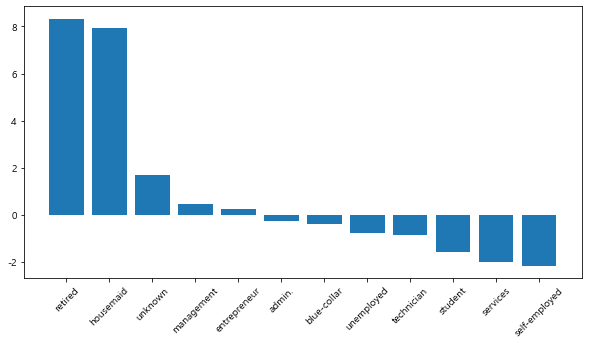

In [82]:
plt.figure(figsize=(10,5))
plt.bar(result.loc['diff'].index,result.loc['diff'])
plt.xticks(rotation=45)
plt.show()

In [83]:
#강사님이 한거

In [84]:
# TODO
pivot = pd.pivot_table(df, values='age', index='y', columns='job', aggfunc='mean')

pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


In [85]:
pivot.loc['diff'] = pivot.loc['yes'] - pivot.loc['no']

pivot

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


In [86]:
result = pivot.sort_values('diff', axis=1, ascending=False)

result

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


<AxesSubplot:xlabel='job'>

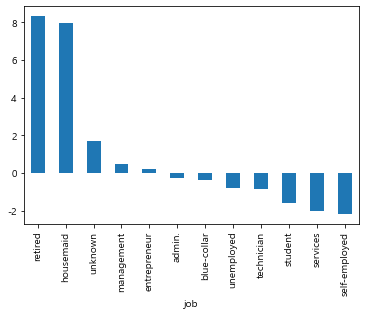

In [87]:
result.loc['diff'].plot.bar()

In [88]:
#내가한거 
#pivot과 동일한 result를 deep copy로만들어 pivot과 result를 동일하지만 
#내용 변경에 따른 영향이안가게 만들고 diff 인덱스 생성후
#행열 전환후 sort시킨다음 다시 전환시킴

In [89]:
#강사님이한거
#pivot에 diff 인덱스 생성후
#result에 diff value가 sort된거를 할당 sort_values에 axis를 넣는게 포인트